#### Reading and Understanding the data

1. Importing the data using the pandas library

2. Understanding the structure of the data


In [1]:
# version
# Python - version 3.12.7
# NumPy - version 1.26.4
# Pandas - version 2.2.2
# Seaborn - version 0.13.2

In [2]:
# import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read the dataset
bikerenting = pd.read_csv('day.csv')
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikerenting.shape

(730, 16)

In [5]:
bikerenting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# check for null values
bikerenting.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
bikerenting.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Visualising the Data

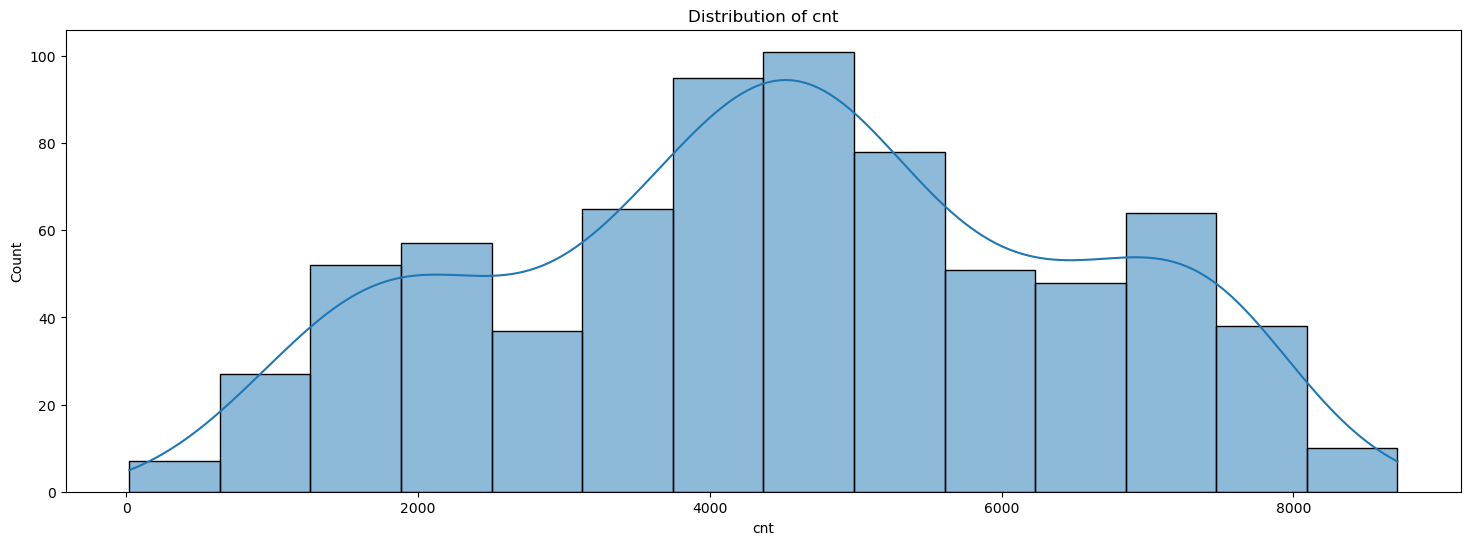

In [8]:
# histogram of cnt
plt.figure(figsize=(18,6))
sns.histplot(bikerenting['cnt'], kde=True)
plt.title('Distribution of cnt')
plt.show()

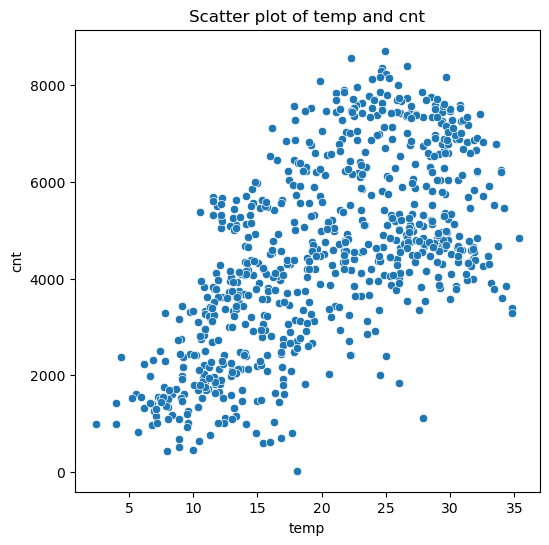

In [9]:
# scatter plot for temp and cnt
plt.figure(figsize=(6,6))
sns.scatterplot(x='temp', y='cnt', data=bikerenting)
plt.title('Scatter plot of temp and cnt')
plt.show()

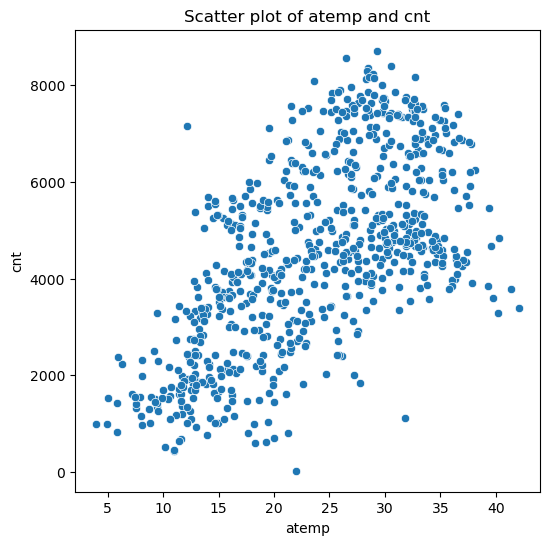

In [10]:
# scatter plot for atem and cnt
plt.figure(figsize=(6,6))
sns.scatterplot(x='atemp', y='cnt', data=bikerenting)
plt.title('Scatter plot of atemp and cnt')
plt.show()

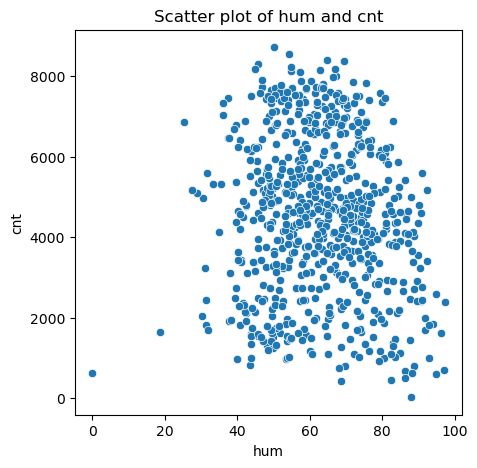

In [11]:
# scatter plot for hum and cnt
plt.figure(figsize=(5,5))
sns.scatterplot(x='hum', y='cnt', data=bikerenting)
plt.title('Scatter plot of hum and cnt')
plt.show()

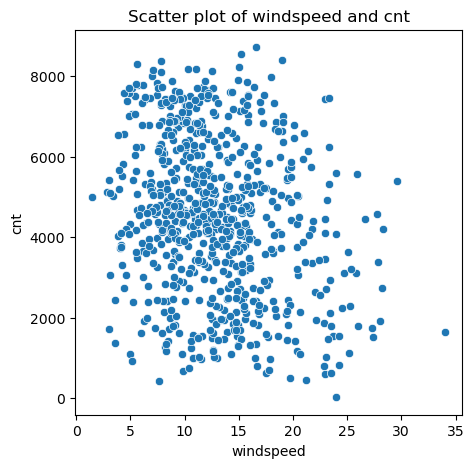

In [12]:
# scatter plot for windspeed and cnt
plt.figure(figsize=(5,5))
sns.scatterplot(x='windspeed', y='cnt', data=bikerenting)
plt.title('Scatter plot of windspeed and cnt')
plt.show()

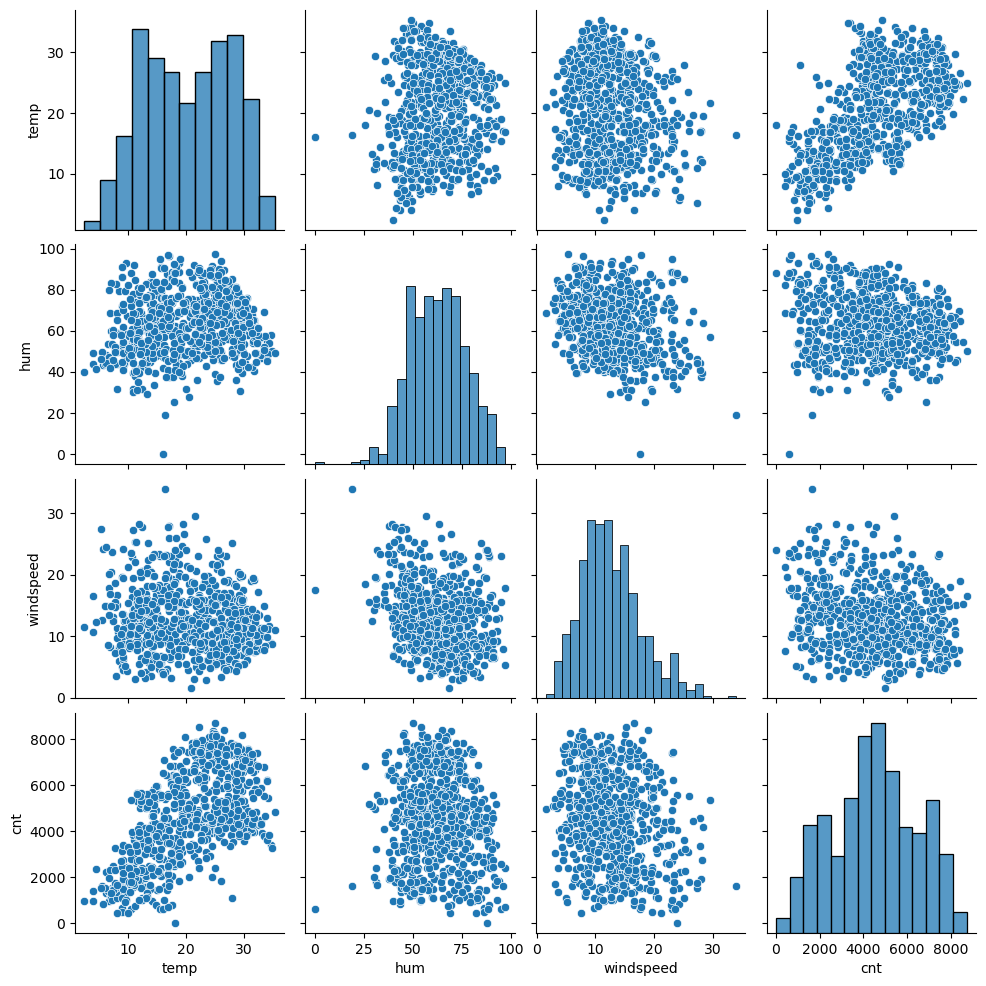

In [13]:
# create pairplot
sns.pairplot(bikerenting[['temp', 'hum', 'windspeed', 'cnt']])
plt.show()

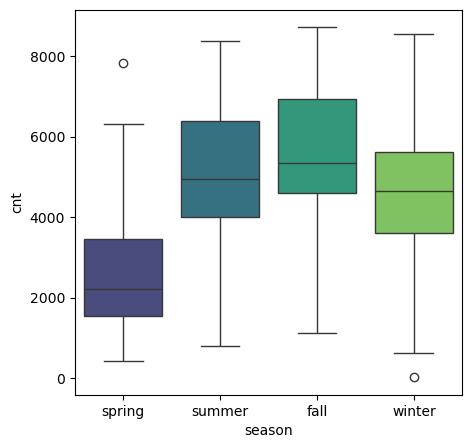

In [14]:
# boxplot for season and cnt
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'season', y = 'cnt',palette='viridis', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(4), ['spring', 'summer', 'fall', 'winter'])
plt.show()

In [15]:
summary = bikerenting.groupby('season')['cnt'].describe()
print(summary)

        count         mean          std     min     25%     50%      75%  \
season                                                                     
1       180.0  2608.411111  1402.659942   431.0  1536.0  2222.5  3463.75   
2       184.0  4992.331522  1695.977235   795.0  4003.0  4941.5  6377.00   
3       188.0  5644.303191  1459.800381  1115.0  4586.5  5353.5  6929.25   
4       178.0  4728.162921  1699.615261    22.0  3615.5  4634.5  5624.50   

           max  
season          
1       7836.0  
2       8362.0  
3       8714.0  
4       8555.0  


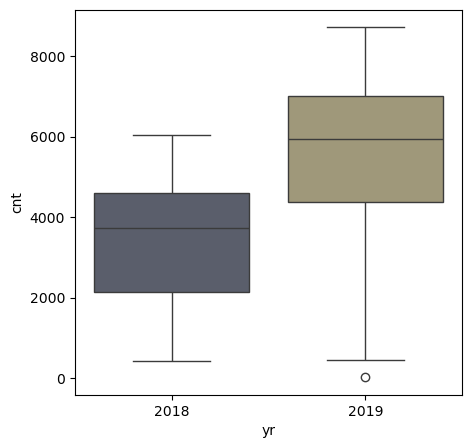

In [16]:
# boxplot for yr and cnt
plt.figure(figsize=(5, 5))
sns.boxplot(x = 'yr', y = 'cnt',palette='cividis', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(2), ['2018', '2019'])
plt.show()

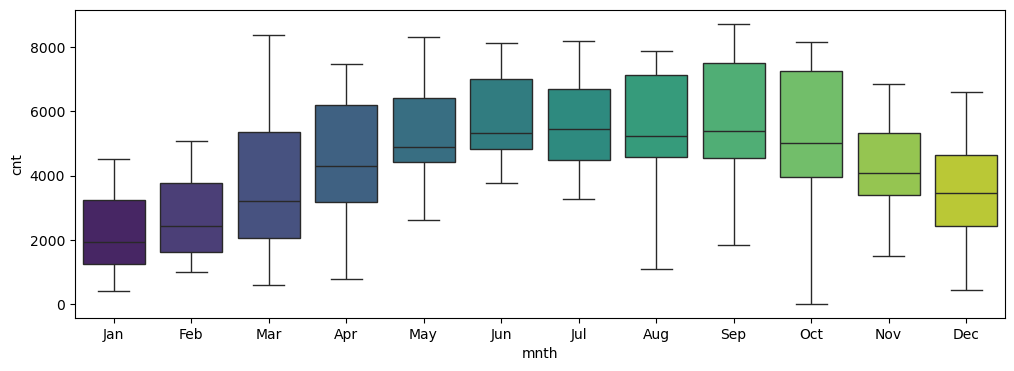

In [17]:
# boxplot for mnth and cnt
plt.figure(figsize=(12, 4))
sns.boxplot(x = 'mnth', y = 'cnt',palette='viridis', data = bikerenting)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


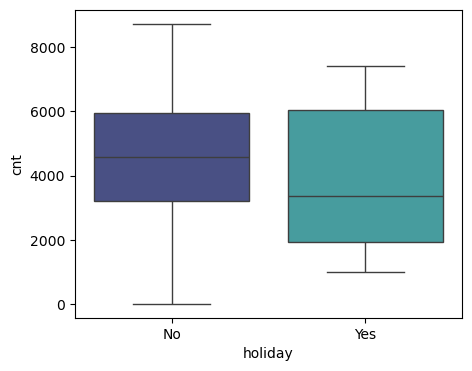

In [18]:
# boxplot for holiday and cnt
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'holiday', y = 'cnt',palette='mako', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.show()

In [19]:
summary = bikerenting.groupby('holiday')['cnt'].describe()
print(summary)

         count        mean         std     min     25%     50%     75%     max
holiday                                                                       
0        709.0  4530.90268  1927.71680    22.0  3214.0  4563.0  5936.0  8714.0
1         21.0  3735.00000  2103.35066  1000.0  1951.0  3351.0  6034.0  7403.0


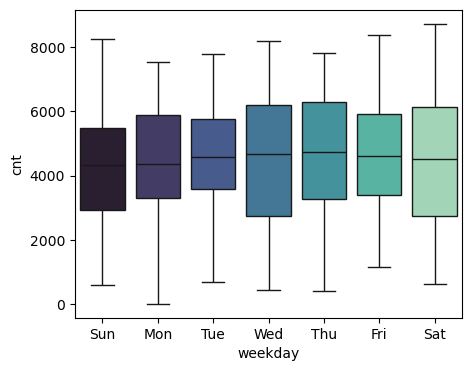

In [20]:
# boxplot for weekday and cnt
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'weekday', y = 'cnt',palette='mako', data = bikerenting)
plt.xticks(np.arange(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.show()


In [21]:
summary = bikerenting.groupby('weekday')['cnt'].describe()
print(summary)

         count         mean          std     min      25%     50%     75%  \
weekday                                                                     
0        105.0  4228.828571  1872.496629   605.0  2918.00  4334.0  5464.0   
1        105.0  4338.123810  1793.074013    22.0  3310.00  4359.0  5875.0   
2        104.0  4510.663462  1826.911642   683.0  3579.25  4576.5  5769.0   
3        103.0  4574.893204  2030.176095   441.0  2731.00  4656.0  6182.5   
4        104.0  4667.259615  1939.433317   431.0  3270.75  4721.0  6286.0   
5        104.0  4690.288462  1874.624870  1167.0  3390.75  4601.5  5900.5   
6        105.0  4550.542857  2196.693009   627.0  2732.00  4521.0  6140.0   

            max  
weekday          
0        8227.0  
1        7525.0  
2        7767.0  
3        8173.0  
4        7804.0  
5        8362.0  
6        8714.0  


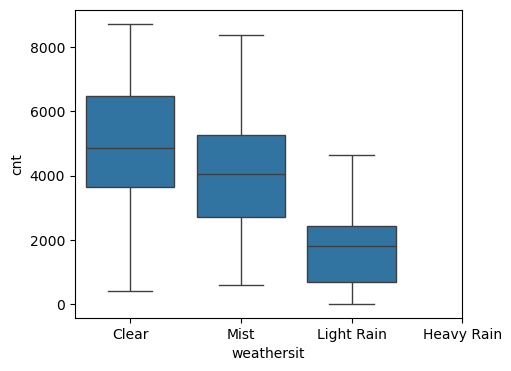

In [22]:
# boxplot for weathersit and cnt
plt.figure(figsize=(5, 4))
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikerenting)
plt.xticks(np.arange(4), ['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.show()

#### Visualising Categorical Variables 

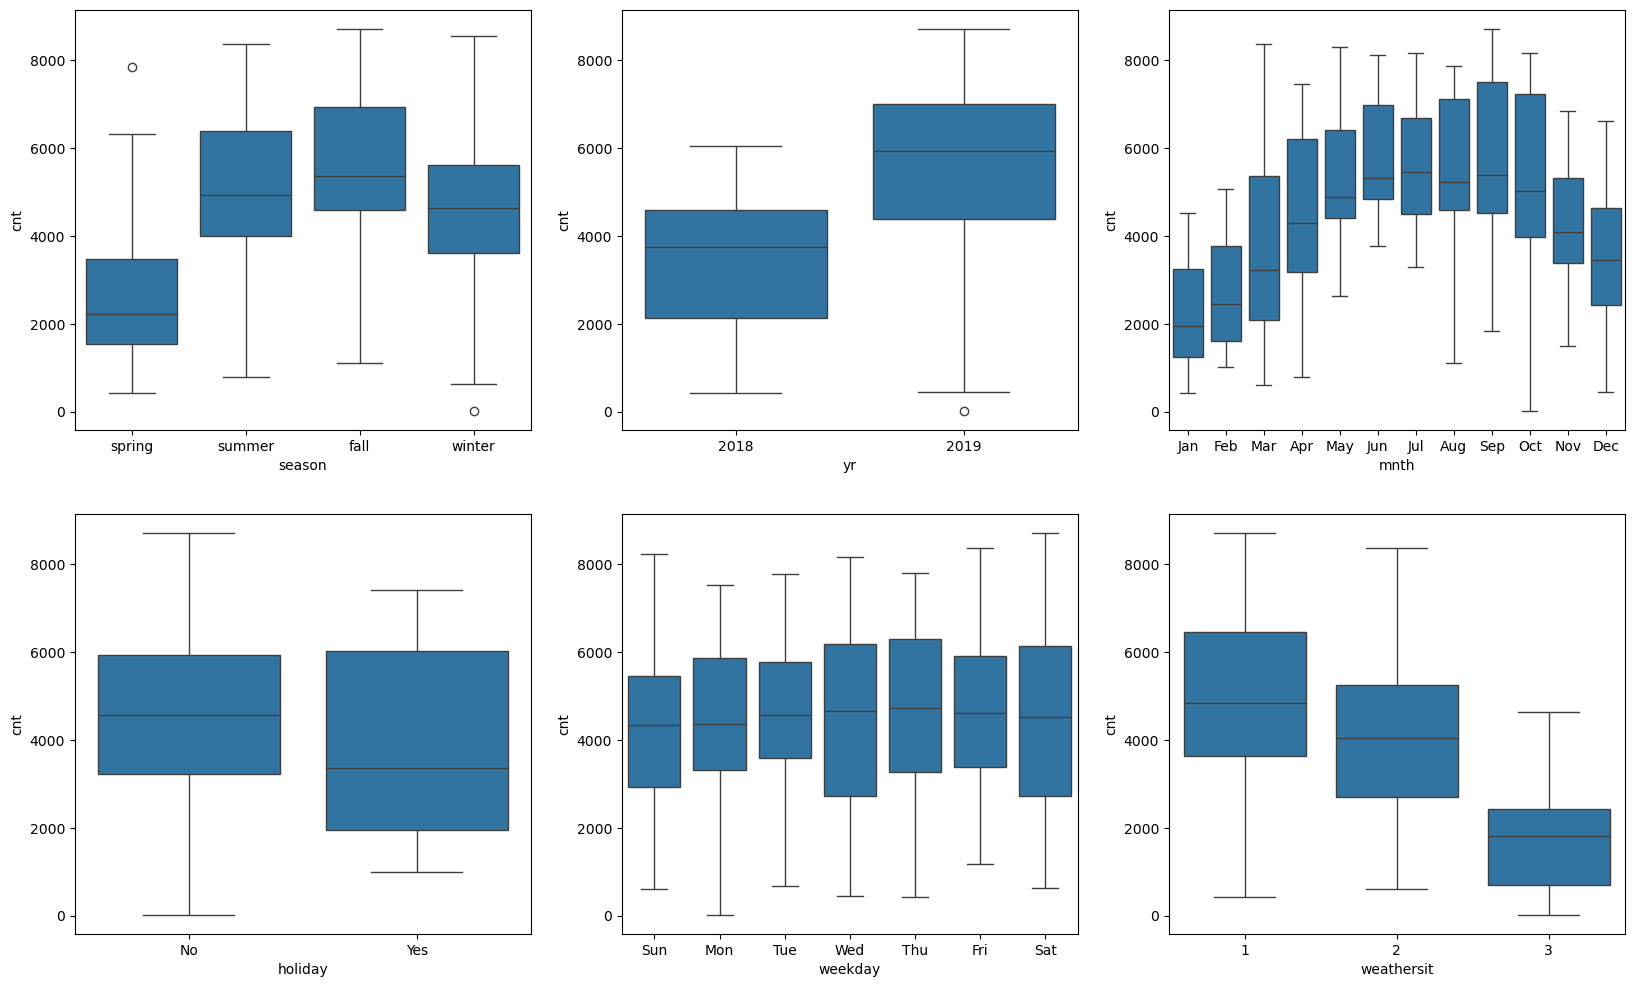

In [23]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(4), ['spring', 'summer', 'fall', 'winter'])
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(2), ['2018', '2019'])
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(2), ['No', 'Yes'])
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikerenting)
# change x axis labels
plt.xticks(np.arange(7), ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikerenting)
plt.show()


#### Data Preparation

In [24]:
# drop the columns 'instant','dteday', 'casual' and 'registered'
bikerenting.drop(['instant','dteday', 'casual', 'registered','atemp','weekday'], axis=1, inplace=True)

##### Create Dummy Variable for Season

- `000` will correspond to spring
- `100` will correspond to summer
- `010` will correspond to fall
- `001` will correspond to winter

In [25]:
# check the value counts of 'season'
bikerenting['season'].value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [26]:
# create dummy variable for season
season = pd.get_dummies(bikerenting['season'], drop_first=True,dtype=int)
# rename the columns
season.columns = ['season_summer', 'season_fall', 'season_winter']
# concatenate the dummy columns to the original dataframe
bikerenting = pd.concat([bikerenting, season], axis=1)
# drop the original column
bikerenting.drop(['season'], axis=1, inplace=True)
season.head()

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
season

,season_summer,season_fall,season_winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


#### Create Dummy Variable for weathersit

- `00` will correspond to Clear, Few clouds, Partly cloudy, Partly cloudy
- `10` will correspond to Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- `01` will correspond to Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [28]:
# check the value counts of 'weathersit'
bikerenting['weathersit'].value_counts()


weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [29]:
# create dummy variable for weathersit
weathersit = pd.get_dummies(bikerenting['weathersit'],drop_first=True,dtype=int)
# rename the columns
weathersit.columns = ['weather_mist_cloud', 'weather_light_snow_rain']
# concatenate the dummy columns to the original dataframe
bikerenting = pd.concat([bikerenting, weathersit], axis=1)
bikerenting.drop(['weathersit'], axis=1, inplace=True)
weathersit

,weather_mist_cloud,weather_light_snow_rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


#### Creating Dummy Variable for Month

- Q1 → (Jan, Feb, Mar) → 1
- Q2 → (Apr, May, Jun) → 2
- Q3 → (Jul, Aug, Sep) → 3
- Q4 → (Oct, Nov, Dec) → 4

- `000` will correspond to Q1
- `100` will correspond to Q2
- `010` will correspond to Q3
- `001` will correspond to Q4

In [30]:
# check the value counts of 'mnth'
bikerenting['mnth'].value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [31]:

# Map months to quarters
bikerenting['quarter'] = bikerenting['mnth'].apply(lambda x: (x - 1) // 3 + 1)

# Create dummy variables for quarters
bikerenting = pd.get_dummies(bikerenting, columns=['quarter'],drop_first=True, prefix='yr_q',dtype=int)

# Drop the original 'mnth' column
bikerenting.drop(columns=['mnth'], inplace=True)


#### Create Dummy Variable for Year

- `0` will correspond to yr_2018
- `1` will correspond to yr_2019 

In [32]:
# create dummy variable for yr
yr = pd.get_dummies(bikerenting['yr'], drop_first=True,dtype=int)
# rename the columns
yr.columns = ['yr_2019']
# concatenate the dummy columns to the original dataframe
bikerenting = pd.concat([bikerenting, yr], axis=1)
# drop the original column
bikerenting.drop(['yr'], axis=1, inplace=True)

In [33]:
# check the info of the dataset
bikerenting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   holiday                  730 non-null    int64  
 1   workingday               730 non-null    int64  
 2   temp                     730 non-null    float64
 3   hum                      730 non-null    float64
 4   windspeed                730 non-null    float64
 5   cnt                      730 non-null    int64  
 6   season_summer            730 non-null    int64  
 7   season_fall              730 non-null    int64  
 8   season_winter            730 non-null    int64  
 9   weather_mist_cloud       730 non-null    int64  
 10  weather_light_snow_rain  730 non-null    int64  
 11  yr_q_2                   730 non-null    int64  
 12  yr_q_3                   730 non-null    int64  
 13  yr_q_4                   730 non-null    int64  
 14  yr_2019                  7

#### Splitting the Data into Training and Testing Sets

In [34]:
# split the dataset into train and test
np.random.seed(0)
df_train, df_test = train_test_split(bikerenting, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features using Min-Max scaling

In [35]:
# rescale the features
scaler = MinMaxScaler()
numeric_var = ['temp','hum','windspeed','cnt']
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])
df_train.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,yr_q_2,yr_q_3,yr_q_4,yr_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,0,0,1,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,1,1
482,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,1,0,1,0,0,1


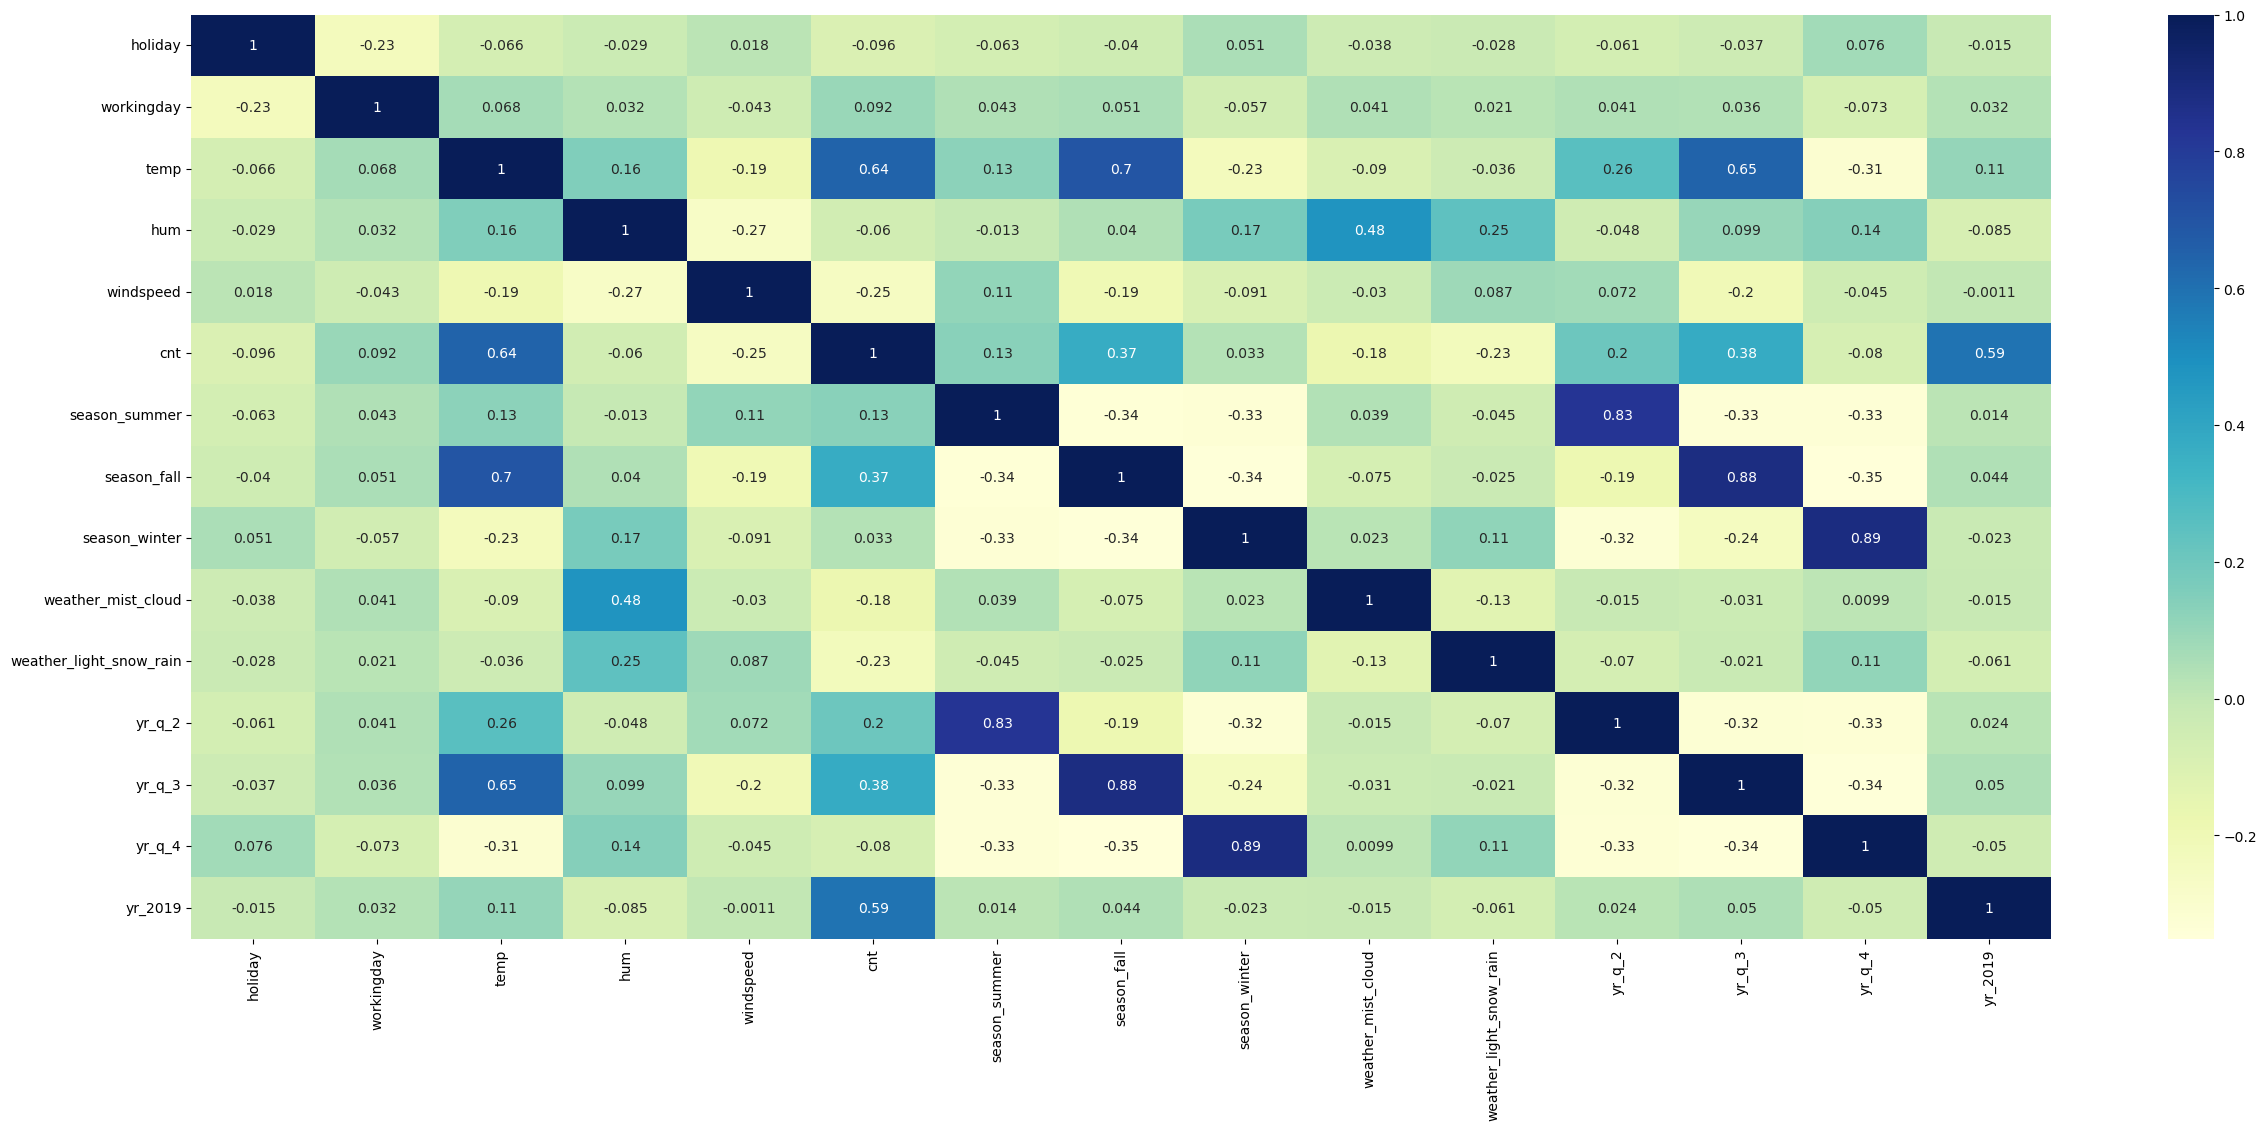

In [36]:
# check correlation of the dataset using heatmap
plt.figure(figsize=(30, 12))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [37]:
# Compute correlation with 'cnt'
correlation_values = df_train.corr()['cnt'].sort_values(ascending=False)
# Print correlation values
print(correlation_values)


cnt                        1.000000
temp                       0.643517
yr_2019                    0.591508
yr_q_3                     0.376453
season_fall                0.371606
yr_q_2                     0.204302
season_summer              0.134343
workingday                 0.092320
season_winter              0.032636
hum                       -0.059993
yr_q_4                    -0.080039
holiday                   -0.095961
weather_mist_cloud        -0.175530
weather_light_snow_rain   -0.226598
windspeed                 -0.253794
Name: cnt, dtype: float64



#### Dividing into X and Y sets for the model building


In [38]:
# create X and y
y_train = df_train.pop('cnt')
X_train = df_train

#### Building a linear model by selecting variables manually

In [39]:
# linear regression model for temp
X_train_lm = sm.add_constant(X_train[['temp']])
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params


const    0.169798
temp     0.639952
dtype: float64

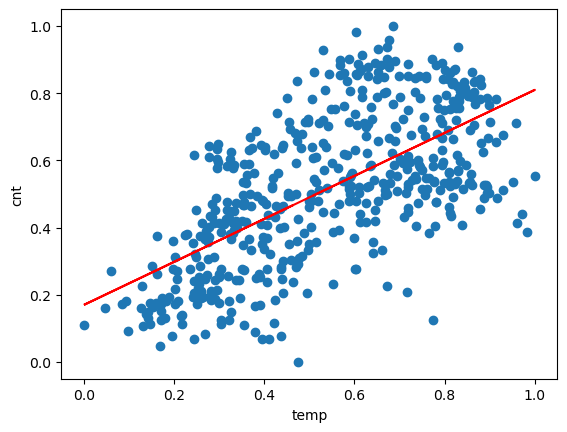

In [40]:
# scatter plot for temp
plt.scatter(X_train['temp'], y_train)
plt.plot(X_train['temp'], 0.169798 + 0.639952*X_train['temp'], 'r')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.show()

#### Build the Model for the all variables

In [41]:
# build a linear model for all the variables
# add constant
X_train_lm = sm.add_constant(X_train)
# create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()
# print the summary of the model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.3
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          5.40e-181
Time:                        20:34:36   Log-Likelihood:                 492.41
No. Observations:                 510   AIC:                            -954.8
Df Residuals:                     495   BIC:                            -891.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# Calculate the VIFs for the new model
X = X_train_lm
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.74
7,season_fall,9.90
12,yr_q_3,8.82
8,season_winter,6.51
13,yr_q_4,6.41
11,yr_q_2,5.54
6,season_summer,5.17
3,temp,4.02
4,hum,1.90
9,weather_mist_cloud,1.57


Removing the below columns as they have high p-value

- season_fall
- yr_q_1
- yr_q_2
- yr_q_4 



In [43]:
# removing the columns 'season_fall','yr_q_1','yr_q_2','yr_q_4' as they have high p-value
# add constant
X_train_lm = sm.add_constant(X_train[[ 
                                       'temp',
                                       'hum',
                                       'windspeed',
                                       'season_summer',
                                       'season_winter',
                                       'weather_mist_cloud',
                                       'weather_light_snow_rain',
                                       'yr_q_3',
                                       'holiday',
                                       'workingday',
                                       'yr_2019'
                                       ]])
# create a fitted model
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params
# print the summary of the model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.1
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.19e-183
Time:                        20:34:36   Log-Likelihood:                 490.43
No. Observations:                 510   AIC:                            -956.9
Df Residuals:                     498   BIC:                            -906.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

#### Calculate the VIF

In [44]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,47.51
8,yr_q_3,2.86
1,temp,2.43
2,hum,1.85
4,season_summer,1.84
6,weather_mist_cloud,1.56
5,season_winter,1.44
7,weather_light_snow_rain,1.24
3,windspeed,1.19
9,holiday,1.07


#### Residula Analysis of the train data

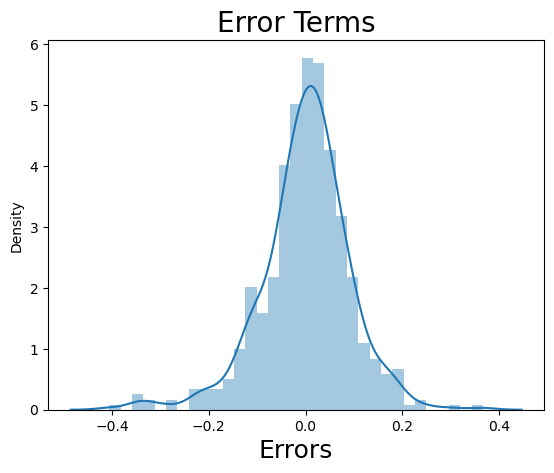

In [45]:
# check the distribution of the error terms
y_train_cnt = lr_1.predict(X_train_lm)
res = y_train - y_train_cnt
sns.distplot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

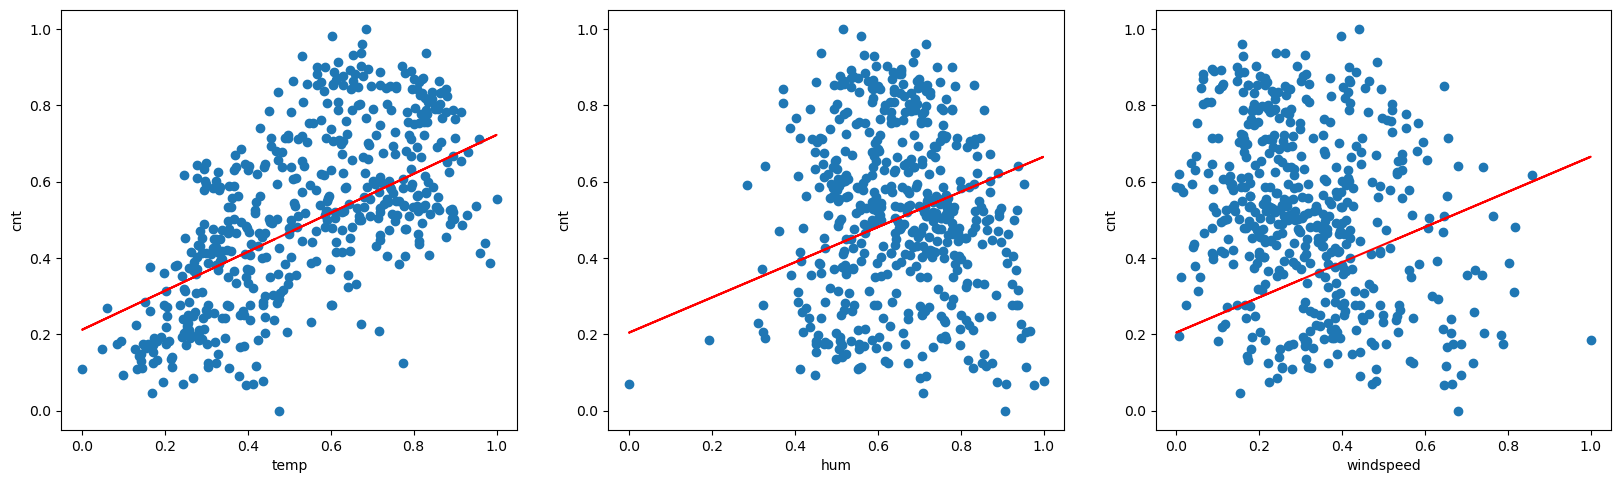

In [46]:
# create pair plot for the all the variables and plot the regression line
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
plt.scatter(X_train['temp'], y_train)
plt.plot(X_train['temp'], 0.2119 + 0.5102*X_train['temp'], 'r')
plt.xlabel('temp')
plt.ylabel('cnt')
plt.subplot(2,3,2)
plt.scatter(X_train['hum'], y_train)
plt.plot(X_train['hum'], 0.2045 + 0.4604*X_train['hum'], 'r')
plt.xlabel('hum')
plt.ylabel('cnt')
plt.subplot(2,3,3)
plt.scatter(X_train['windspeed'], y_train)
plt.plot(X_train['windspeed'], 0.2045 + 0.4604*X_train['windspeed'], 'r')
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.show()





#### Making Predictions Using the Final Model

In [47]:
# apply the scaling on the test sets
numeric_var = ['temp','hum','windspeed','cnt']
df_test[numeric_var] = scaler.transform(df_test[numeric_var])
df_test.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,yr_q_2,yr_q_3,yr_q_4,yr_2019
184,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,1,0,0,1,0,0
535,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,1,0,0,1
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,1,0,0,0,1,0
221,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,0,1,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,1,0,0,0


In [48]:
df_test.describe()

,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weather_mist_cloud,weather_light_snow_rain,yr_q_2,yr_q_3,yr_q_4,yr_2019
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.319635,0.027397,0.273973,0.251142,0.242009,0.479452
std,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.467403,0.163612,0.447017,0.434663,0.429281,0.500722
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test


In [49]:
# create X and y
y_test = df_test.pop('cnt')
X_test = df_test


In [50]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test[[ 
                                       'temp',
                                       'hum',
                                       'windspeed',
                                       'season_summer',
                                       'season_winter',
                                       'weather_mist_cloud',
                                       'weather_light_snow_rain',
                                       'yr_q_3',
                                       'holiday',
                                       'workingday',
                                       'yr_2019'
                                       ]])



In [51]:
# Making predictions using the model
y_pred = lr_1.predict(X_test)

#### Model Evaluation

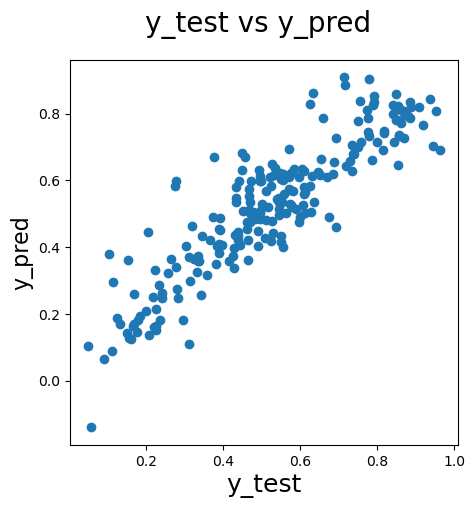

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [53]:
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
r2_score(y_test, y_pred)

Mean_Squared_Error : 0.009686748493429775


0.7960504543310527

##### Model Building RFE

In [54]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [56]:
# Running RFE
rfe = RFE( lm, step=15)
rfe = rfe.fit(X_train, y_train)


In [57]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', False, 2),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', False, 2),
 ('season_winter', True, 1),
 ('weather_mist_cloud', False, 2),
 ('weather_light_snow_rain', True, 1),
 ('yr_q_2', False, 2),
 ('yr_q_3', False, 2),
 ('yr_q_4', False, 2),
 ('yr_2019', True, 1)]

In [58]:
# list of the columns which are selected
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weather_light_snow_rain', 'yr_2019'],
      dtype='object')

In [59]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [60]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)


In [61]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()


In [62]:
#Print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 24 Feb 2025   Prob (F-statistic):          1.06e-177
Time:                        20:34:37   Log-Likelihood:                 464.81
No. Observations:                 510   AIC:                            -913.6
Df Residuals:                     502   BIC:                            -879.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [63]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.82
5,season_winter,1.24
2,hum,1.23
1,temp,1.16
3,windspeed,1.16
4,season_summer,1.14
6,weather_light_snow_rain,1.10
7,yr_2019,1.02


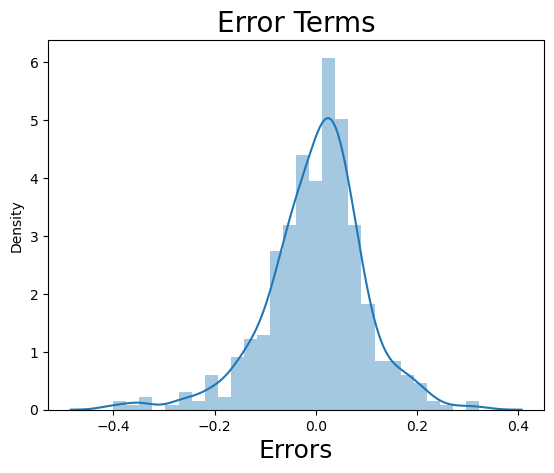

In [64]:
# Residual Analysis of the train data
y_train_cnt = lm.predict(X_train_rfe)
res = y_train - y_train_cnt
sns.distplot(res)
plt.title('Error Terms', fontsize=20)
plt.xlabel('Errors', fontsize=18)
plt.show()

In [65]:
# Making predictions using the model
X_test_rfe = X_test[col]
# Adding a constant variable
X_test_rfe = sm.add_constant(X_test_rfe)
# Making predictions
y_pred = lm.predict(X_test_rfe)


In [66]:
print(y_test)

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64


In [67]:
print(y_pred)

184    0.581730
535    0.925311
299    0.423406
221    0.614932
152    0.640580
         ...   
400    0.396058
702    0.686431
127    0.509145
640    0.860076
72     0.283068
Length: 219, dtype: float64


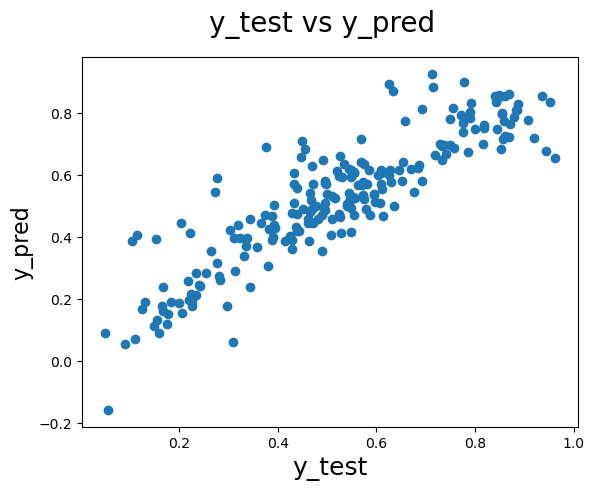

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()


In [69]:
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
r2_score(y_test, y_pred)


Mean_Squared_Error : 0.010273183192060383


0.7837033710521443

#### Best Fit Line 

$ cnt = 0.5102  \times  temp + (-0.1496  \times hum) + (-0.1820 \times windspeed) + 
(0.1092 \times \text{season\_summer}) + 
(0.1540 \times \text{season\_winter}) + 
(-0.0548 \times \text{weather\_mist\_cloud}) + 
(-0.2389 \times \text{weather\_light\_snow\_rain}) + 
(0.0680 \times \text{yr\_q3}) + 
(-0.0745 \times holiday) + 
(0.0182 \times workingday) + 
(0.2292 \times \text{yr\_2019}) + 
(0.2119)  
$
